In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/puneet6060/intel-image-classification'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ritikagrawal4
Your Kaggle Key: ··········


  1%|▏         | 5.00M/346M [00:00<00:08, 44.7MB/s]

100%|██████████| 346M/346M [00:02<00:00, 139MB/s]


In [3]:
os.chdir('/content/intel-image-classification/')
import os
cwd = os.getcwd()
cwd

'/content/intel-image-classification'

In [4]:
Train = './seg_train/seg_train'
Validation = './seg_test/seg_test'
Test = './intel-image-classification/seg_pred/seg_pred'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=Train, target_size=(224,224), classes=['buildings', 'forest', 'glacier','mountain','sea','street'], batch_size=10)


valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=Validation, target_size=(224,224), classes=['buildings', 'forest', 'glacier','mountain','sea','street'], batch_size=10)




Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory('.', classes=['seg_pred'], target_size=(224,224), batch_size=10 )

Found 7301 images belonging to 1 classes.


In [7]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

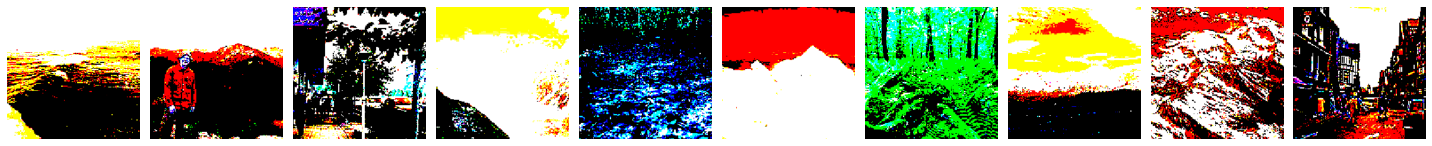

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# fit the model
model.fit(
  train_batches,
  validation_data=valid_batches,
  epochs=10,
  #callbacks=[earlystopping],
  steps_per_epoch=len(train_batches),
  validation_steps=len(valid_batches)
)

Epoch 1/10
1404/1404 [==============================] - 70s 27ms/step - loss: 11.0003 - accuracy: 0.5652 - val_loss: 0.8662 - val_accuracy: 0.6947
Epoch 2/10
1404/1404 [==============================] - 36s 26ms/step - loss: 0.2468 - accuracy: 0.9255 - val_loss: 1.0053 - val_accuracy: 0.7277
Epoch 3/10
1404/1404 [==============================] - 35s 25ms/step - loss: 0.0622 - accuracy: 0.9850 - val_loss: 1.1000 - val_accuracy: 0.7283
Epoch 4/10
1404/1404 [==============================] - 35s 25ms/step - loss: 0.0664 - accuracy: 0.9930 - val_loss: 1.1370 - val_accuracy: 0.7377
Epoch 5/10
1404/1404 [==============================] - 36s 26ms/step - loss: 0.0652 - accuracy: 0.9858 - val_loss: 1.5233 - val_accuracy: 0.6833
Epoch 6/10
1404/1404 [==============================] - 36s 26ms/step - loss: 0.0545 - accuracy: 0.9885 - val_loss: 1.4190 - val_accuracy: 0.7217
Epoch 7/10
1404/1404 [==============================] - 36s 25ms/step - loss: 0.0607 - accuracy: 0.9892 - val_loss: 1.4444 

Save and Load model

In [12]:
model.save("model.h5")

In [13]:
model_ = keras.models.load_model("model.h5")

Making Predictions

In [14]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

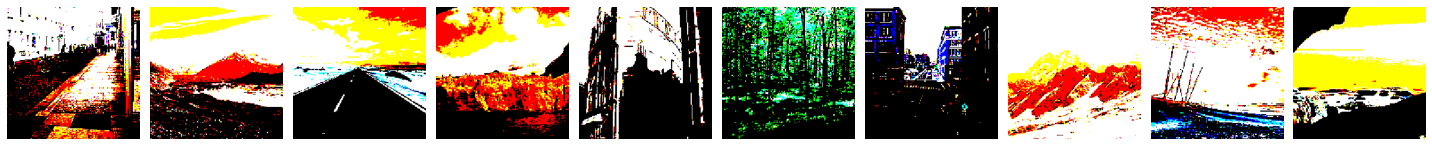

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(test_imgs)
print(test_labels)

In [37]:
test_batches.reset()

In [38]:
predictions = model_.predict(test_batches, steps=len(test_batches), verbose=0)

In [39]:
np.round(predictions)

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [40]:
predictions[1]

array([4.6658681e-09, 9.9999905e-01, 3.8189152e-12, 9.1890091e-13,
       3.8283424e-17, 9.9350927e-07], dtype=float32)

In [20]:
predicted_class_indices=labels[np.argmax(predictions,axis=1)]
predicted_class_indices

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [60]:
y_pred=labels[np.argmax(predictions, axis=-1)]

y_pred.shape

(7301, 10)

In [61]:
labels = labels.transpose()
labels.shape

(10, 6)

In [62]:
test_batches.class_indices 

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

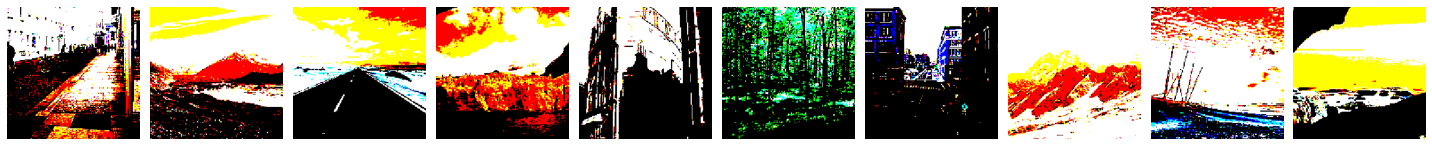

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [64]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(test_imgs)
print(predicted_class_indices)